# 다섯번째 시도

Key Attempts:
- 감독, 배급사, 배우, 장르는 각 레이블의 관객수 중압값으로 치환
- 개봉월, 국가는 0,1 레이블 인코딩
- 감독, 배급사, 배우, 장르, 상영시간 normalise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/join_final_v2.csv', encoding='utf-8-sig', thousands=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   int64  
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   view         6806 non-null   int64  
 8   openMonth    6806 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 478.7+ KB


## 1. 메디안 값 치환

In [4]:
# 감독, 배우, 배급사 각각의 중앙 값 테이블 만들기
director = df.groupby('director').agg({"view":"median"}).reset_index()
actor = df.groupby('actor').agg({"view":"median"}).reset_index()
distributor = df.groupby('distributor').agg({"view":"median"}).reset_index()
genre = df.groupby('genre').agg({"view":"median"}).reset_index()

In [5]:
for idx, row in df.iterrows():
    act = row['actor']
    dist = row['distributor']
    dir = row['director']
    g = row['genre']

    a_val = actor[actor['actor'] == act]['view'].values[0]
    df.loc[idx, 'actor'] = a_val

    dist_val = distributor[distributor['distributor'] == dist]['view'].values[0]
    df.loc[idx, 'distributor'] = dist_val

    dir_val = director[director['director'] == dir]['view'].values[0]
    df.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    df.loc[idx, 'genre'] = g_val

In [6]:
df.head()

,runTm,nation,genre,director,actor,is_adult,distributor,view,openMonth
0,136.0,2,13326.0,954845.5,167141.0,0.0,528537.0,1865469,7
1,119.0,3,148406.0,2674.0,17258.0,0.0,8048.0,24634,1
2,116.0,1,49803.5,6065474.0,3024666.0,1.0,708108.5,943241,4
3,125.0,2,13326.0,507938.5,58644.0,0.0,13547.0,85594,3
4,105.0,1,31655.0,193554.0,193554.0,0.0,62026.0,193554,6


## 2. 관객 수 범주형 변환

In [7]:
for idx, row in df.iterrows():
    val = row['view']
    if val <10000:
        df.loc[idx, 'view'] = 1
    elif val <100000:
        df.loc[idx, 'view'] = 2
    elif val <200000:
        df.loc[idx, 'view'] = 3
    elif val <400000:
        df.loc[idx, 'view'] = 4
    elif val <600000:
        df.loc[idx, 'view'] = 5
    elif val <800000:
        df.loc[idx, 'view'] = 6
    elif val <1000000:
        df.loc[idx, 'view'] = 7
    else:
        df.loc[idx, 'view'] = 8

## 3. 라벨인코딩

In [8]:
y = df['view']
X = df.drop('view', axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   runTm        6806 non-null   float64
 1   nation       6806 non-null   int64  
 2   genre        6806 non-null   float64
 3   director     6806 non-null   object 
 4   actor        6806 non-null   object 
 5   is_adult     6806 non-null   float64
 6   distributor  6806 non-null   object 
 7   openMonth    6806 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 425.5+ KB


In [10]:
X = pd.get_dummies(data = X, columns=['nation'], prefix='region')

In [11]:
X = pd.get_dummies(data = X, columns=['openMonth'], prefix='month')

In [12]:
X.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

## 4. 데이터 스플릿

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

## 5. Normalise

In [14]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
619,111.0,17246.0,219824.0,219824.0,0.0,374215.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1314,78.0,39946.5,214097.0,32517.5,0.0,16143.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
861,98.0,74600.5,161342.5,146660.5,1.0,352226.5,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5384,123.0,13326.0,11067.0,11067.0,0.0,50196.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4283,119.0,39946.5,44770.5,49832.0,0.0,7213.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,104.0,31655.0,47923.0,603634.0,0.0,528537.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
726,110.0,31655.0,1049616.5,446780.0,0.0,352226.5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1414,166.0,13326.0,477329.5,275944.5,0.0,367308.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,100.0,31655.0,60219.0,117006.0,0.0,361682.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# train data의 runTm 컬럼만 normalisation fit 적용
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train.iloc[:,0:6] = mm.fit_transform(X_train.iloc[:, 0:6])

In [16]:
X_train

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
619,0.309091,0.072392,0.019324,0.021998,0.0,0.145299,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1314,0.159091,0.232938,0.018818,0.003168,0.0,0.005895,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
861,0.250000,0.478023,0.014160,0.014643,1.0,0.136739,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5384,0.363636,0.044669,0.000889,0.001012,0.0,0.019153,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4283,0.345455,0.232938,0.003865,0.004909,0.0,0.002419,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,0.277273,0.174298,0.004144,0.060582,0.0,0.205379,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
726,0.304545,0.174298,0.092602,0.044814,0.0,0.136739,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1414,0.559091,0.044669,0.042064,0.027640,0.0,0.142610,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1523,0.259091,0.174298,0.005230,0.011662,0.0,0.140420,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# test 데이터의 runTm 컬럼도 같은 minMax scaler transform
X_test.iloc[:,0:6] = mm.transform(X_test.iloc[:, 0:6])

## 6. Modelling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_train = lr_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lr_train))
print("test accuracy : ", accuracy_score(y_test, lr_pred))

train accuracy :  0.4997900923593619
test accuracy :  0.48188050930460335


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=8)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_train = dt_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, dt_train))
print("test accuracy : ", accuracy_score(y_test, dt_pred))

train accuracy :  0.8060453400503779
test accuracy :  0.7242899118511263


Feature: runTm, Score: 0.02402
Feature: genre, Score: 0.00697
Feature: director, Score: 0.73224
Feature: actor, Score: 0.16937
Feature: is_adult, Score: 0.00202
Feature: distributor, Score: 0.04727
Feature: region_1, Score: 0.00140
Feature: region_2, Score: 0.00255
Feature: region_3, Score: 0.00087
Feature: month_1, Score: 0.00135
Feature: month_2, Score: 0.00116
Feature: month_3, Score: 0.00000
Feature: month_4, Score: 0.00054
Feature: month_5, Score: 0.00126
Feature: month_6, Score: 0.00253
Feature: month_7, Score: 0.00000
Feature: month_8, Score: 0.00264
Feature: month_9, Score: 0.00174
Feature: month_10, Score: 0.00016
Feature: month_11, Score: 0.00062
Feature: month_12, Score: 0.00129


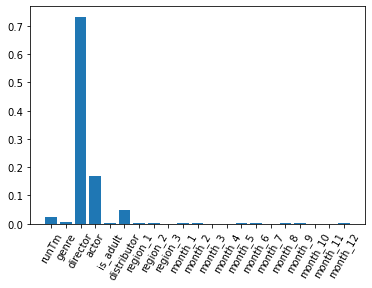

In [20]:
importance = dt_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, rf_train))
print("test accuracy : ", accuracy_score(y_test, rf_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.738001958863859


Feature: runTm, Score: 0.09561
Feature: genre, Score: 0.04810
Feature: director, Score: 0.32418
Feature: actor, Score: 0.24558
Feature: is_adult, Score: 0.01261
Feature: distributor, Score: 0.14651
Feature: region_1, Score: 0.00886
Feature: region_2, Score: 0.00914
Feature: region_3, Score: 0.01319
Feature: month_1, Score: 0.00817
Feature: month_2, Score: 0.00906
Feature: month_3, Score: 0.00835
Feature: month_4, Score: 0.00838
Feature: month_5, Score: 0.00767
Feature: month_6, Score: 0.00677
Feature: month_7, Score: 0.00726
Feature: month_8, Score: 0.00788
Feature: month_9, Score: 0.00848
Feature: month_10, Score: 0.00814
Feature: month_11, Score: 0.00860
Feature: month_12, Score: 0.00747


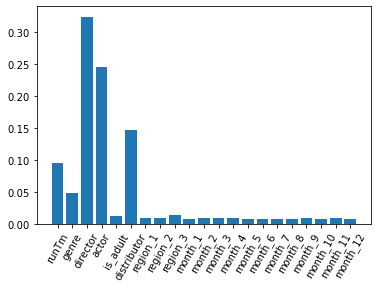

In [22]:
importance = rf_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

In [23]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average = False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)
lgbm_train = rf_clf.predict(X_train)

print("train accuracy : ", accuracy_score(y_train, lgbm_train))
print("test accuracy : ", accuracy_score(y_test, lgbm_pred))

train accuracy :  0.9997900923593619
test accuracy :  0.7316356513222331


Feature: runTm, Score: 35077.00000
Feature: genre, Score: 12650.00000
Feature: director, Score: 38731.00000
Feature: actor, Score: 39866.00000
Feature: is_adult, Score: 2157.00000
Feature: distributor, Score: 30451.00000
Feature: region_1, Score: 1791.00000
Feature: region_2, Score: 2466.00000
Feature: region_3, Score: 1503.00000
Feature: month_1, Score: 1076.00000
Feature: month_2, Score: 1324.00000
Feature: month_3, Score: 1089.00000
Feature: month_4, Score: 1205.00000
Feature: month_5, Score: 922.00000
Feature: month_6, Score: 784.00000
Feature: month_7, Score: 819.00000
Feature: month_8, Score: 1112.00000
Feature: month_9, Score: 1032.00000
Feature: month_10, Score: 1158.00000
Feature: month_11, Score: 982.00000
Feature: month_12, Score: 1223.00000


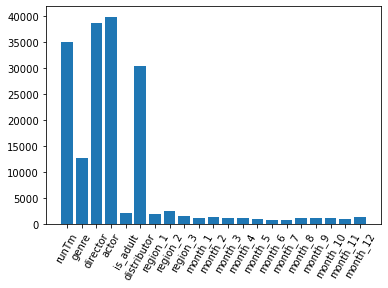

In [24]:
importance = lgbm_clf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' %(X_train.columns[i],v))

plt.bar(X_train.columns, importance)
plt.xticks(rotation=60)
plt.show()

## 7. Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings

warnings.filterwarnings('ignore')

In [26]:
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=13, n_estimators=100, learning_rate=0.01, max_depth=4)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_train_pd = gb_clf.predict(X_train)

print("ACC : ", accuracy_score(y_test, gb_pred))
print("Fit time : ", time.time() - start_time)

ACC :  0.7556317335945152
Fit time :  9.126491069793701


In [27]:
print("Train Accuracy : ", accuracy_score(y_train, gb_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, gb_pred))

Train Accuracy :  0.7917716204869857
Test Accuracy :  0.7556317335945152


In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 300],
    'learning_rate' : [0.01, 0.1]
}

start_time = time.time()
grid = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
grid_train_pd = grid.predict(X_train)

print("ACC : ", accuracy_score(y_test, grid_pred))
print("Fit time : ", time.time() - start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
ACC :  0.7487757100881489
Fit time :  60.46278619766235


In [29]:
print("Train Accuracy : ", accuracy_score(y_train, grid_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, grid_pred))

Train Accuracy :  0.8327036104114189
Test Accuracy :  0.7487757100881489


In [30]:
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

y_train_copy -= 1
y_test_copy -= 1

In [31]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3)
xgb.fit(X_train.values, y_train_copy.values)

print("Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7512242899118511
Fit time :  3.656346082687378


In [32]:
print("Train Accuracy : ", accuracy_score(y_train_copy.values, xgb.predict(X_train.values)))
print("Test Accuracy : ", accuracy_score(y_test_copy.values, xgb.predict(X_test.values)))

Train Accuracy :  0.7651133501259446
Test Accuracy :  0.7512242899118511


In [33]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
abc = AdaBoostClassifier(n_estimators=200, base_estimator= dt_clf ,learning_rate=0.01)
abc.fit(X_train.values, y_train.values)
abc_pred = abc.predict(X_test)
abc_train_pd = abc.predict(X_train)

print("Accuracy : ", accuracy_score(y_test.values, abc_pred))
print('Fit time : ', time.time() - start_time)

Accuracy :  0.7159647404505387
Fit time :  5.068535089492798


In [34]:
print("Train Accuracy : ", accuracy_score(y_train, abc_train_pd))
print("Test Accuracy : ", accuracy_score(y_test, abc_pred))

Train Accuracy :  0.9473131821998321
Test Accuracy :  0.7159647404505387


---

## 8. Conclusion

- 세번째 시도와의 차이점으로는 개봉 월을 중앙값 치환이 아닌 레이블 인코딩을 돌렸다.
- 개봉 월 자체가 중요한 feature가 아니어서 세번째와 다섯번째 시도에 뚜렸한 성능 차이는 보이지 않는다.

---

## 9. Prediction

### 9.1 데이터 불러오기

In [65]:
pred_df = pd.read_excel('./data/prediction_data.xlsx')

In [66]:
pred_df

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,NaN,NaN
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,NaN,NaN
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,NaN,NaN
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,NaN,NaN
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,NaN,NaN
5,"Crazy, Stupid, Love.",118,2,5,글렌 피카라,스티브 카렐,0,NaN,NaN
6,Scott Pilgrim vs. the World,112,2,2,에드가 라이트,마이클 세라,0,NaN,NaN
7,Anchorman: The Legend of Ron Burgundy,94,2,5,아담 맥케이,윌 페렐,0,NaN,NaN
8,Serenity,119,2,1,스티븐 나이트,매튜 매커너히,0,NaN,NaN
9,Forgetting Sarah Marshall,111,2,5,니콜라스 스톨러,제이슨 세걸,1,NaN,NaN


### 9.2 레이블인코딩

In [67]:
pred_copy = pred_df.copy()

In [68]:
pred_copy = pd.get_dummies(data = pred_copy, columns=['nation'], prefix='region')

In [69]:
# 1 = 한국이란 값이 예측 데이터에는 없기에, 0값으로 추가
pred_copy['region_1'] = 0

In [70]:
pred_copy = pred_copy.drop(["movieNmEn", "openMonth"], axis=1)

In [71]:
pred_copy[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']] = 0

In [72]:
# 위의 학습 데이터와 컬럼 순서를 같게 만들어주기
pred_copy = pred_copy.reindex(columns=['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor', 'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'])

In [73]:
pred_copy.columns

Index(['runTm', 'genre', 'director', 'actor', 'is_adult', 'distributor',
       'region_1', 'region_2', 'region_3', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

### 9.3 감독/배우/장르 중앙값 추가

In [74]:
# 기존에 학습 데이터에서 사용한 감독/배우 테이블에 해당 이름이 없으면 최소값인 1,001로 입력
for idx, row in pred_copy.iterrows():
    act = row['actor']
    dir = row['director']
    g = row['genre']

    try:
        a_val = actor[actor['actor'] == act]['view'].values[0]
    except:
        a_val = 1001
    
    try:
        dir_val = director[director['director'] == dir]['view'].values[0]
    except:
        dir_val = 1001
    
    pred_copy.loc[idx, 'actor'] = a_val
    pred_copy.loc[idx, 'director'] = dir_val

    g_val = genre[genre['genre'] == g]['view'].values[0]
    pred_copy.loc[idx, 'genre'] = g_val

### 9.4 배급사 중앙값, 개봉 월 추가

In [75]:
distributor.sort_values('view', ascending=False).head(10)

,distributor,view
368,월트디즈니컴퍼니코리아(주),2569599.5
344,에스케이플래닛(주),2142670.0
331,아이러브시네마,1677571.5
2,(유)씨에이치엔터테인먼트,1544486.0
367,월트디즈니컴퍼니코리아 유한책임회사,1408044.5
403,주식회사 해리슨앤컴퍼니,1360046.0
108,(주)스튜디오210,1112238.0
140,(주)에이스메이커무비웍스,878385.5
396,주식회사 에이비오엔터테인먼트,818930.0
276,롯데컬처웍스(주)롯데엔터테인먼트,723622.0


In [76]:
# 배급사는 해리슨앤컴퍼니, 개봉월은 4월 임의로 지정
pred_copy['distributor'] = 1360046.0
pred_copy['month_4'] = 1

In [77]:
pred_copy.head()

,runTm,genre,director,actor,is_adult,distributor,region_1,region_2,region_3,month_1,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,148,13326.0,1001,93086.5,0,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,113,31655.0,61808.0,641323.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,88,31655.0,2012489.5,113795.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,99,31655.0,85165.0,85165.0,1,1360046.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,109,148406.0,655078.0,641323.0,1,1360046.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 9.5 Normalisation

In [78]:
pred_copy.iloc[:,0:6] = mm.transform(pred_copy.iloc[:, 0:6])

### 9.6 예측 관객수

In [79]:
xgb_prediction = xgb.predict(pred_copy.values)
gb_prediction = gb_clf.predict(pred_copy)

In [80]:
xgb_prediction += 1

In [81]:
pred_copy['xgb_pred'] = xgb_prediction
pred_copy['gb_pred'] = gb_prediction

In [82]:
pred_df['xgb_pred'] = xgb_prediction
pred_df['gb_pred'] = gb_prediction

In [83]:
pred_df['distributor'] = '주식회사 해리슨앤컴퍼니'
pred_df['openMonth'] = 4

In [84]:
pred_df

,movieNmEn,runTm,nation,genre,director,actor,is_adult,distributor,openMonth,xgb_pred,gb_pred
0,Into the Wild,148,2,1,숀 펜,에밀 허쉬,0,주식회사 해리슨앤컴퍼니,4,1,1
1,Superbad,113,2,5,그렉 모톨라,조나 힐,1,주식회사 해리슨앤컴퍼니,4,2,2
2,Zombieland,88,2,5,루벤 플레셔,우디 해럴슨,1,주식회사 해리슨앤컴퍼니,4,8,8
3,Shaun of the Dead,99,3,5,에드가 라이트,사이먼 페그,1,주식회사 해리슨앤컴퍼니,4,2,2
4,21 Jump Street,109,2,2,필 로드,조나 힐,1,주식회사 해리슨앤컴퍼니,4,6,6
5,"Crazy, Stupid, Love.",118,2,5,글렌 피카라,스티브 카렐,0,주식회사 해리슨앤컴퍼니,4,2,2
6,Scott Pilgrim vs. the World,112,2,2,에드가 라이트,마이클 세라,0,주식회사 해리슨앤컴퍼니,4,1,2
7,Anchorman: The Legend of Ron Burgundy,94,2,5,아담 맥케이,윌 페렐,0,주식회사 해리슨앤컴퍼니,4,3,4
8,Serenity,119,2,1,스티븐 나이트,매튜 매커너히,0,주식회사 해리슨앤컴퍼니,4,1,1
9,Forgetting Sarah Marshall,111,2,5,니콜라스 스톨러,제이슨 세걸,1,주식회사 해리슨앤컴퍼니,4,1,1


---